# Twitter Data Cleaning Script

#### Import necessary packages for data cleaning and visualization

In [12]:
import pandas as pd
import numpy as np
import nltk
import advertools as adv
import text2emotion as te
import matplotlib.pyplot as plt
from textblob import TextBlob
from normalizer import preprocess
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

## PREPROCESSING

In [13]:
data = pd.read_csv('./hyunhotime.csv', engine='python')

#### *Filter only english tweets from collected data

In [14]:
english_only = data.loc[data['lang'] == 'en']

In [15]:
text_data = english_only['text'].to_numpy()

#### Process tweets using the normalizer.py for cleaning

In [67]:
preprocessed_text_data = [preprocess(text) for text in text_data]

#### Removing duplicates

In [68]:
tweet_documents = np.unique([" ".join(sent) for sent in preprocessed_text_data])

###### from here a certain feature should be selected to get your desired results

## PLOTTING TWEETS OVER TIME

In [33]:
retweeted_data_time = data
retweeted_data_time.rename(columns={'created_at': 'date'}, inplace=True)
retweeted_data_time = retweeted_data_time[['date']]
retweeted_data_time = retweeted_data_time.assign(count=1) #count added to know how many tweets are made over time
retweeted_data_time = retweeted_data_time.set_index('date')

In [34]:
retweeted_data_time.index = pd.to_datetime(retweeted_data_time.index) #change the datatype of the data frame item from str to datetime data type 

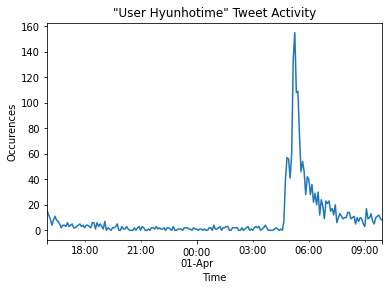

In [35]:
retweeted_data_time = retweeted_data_time['count'].resample('5T').sum()\
.plot(ylabel='Occurences', xlabel='Time', title='"User Hyunhotime" Tweet Activity'); #resampling needed for method frequency conversion

In [36]:
tweet_activity_plot = retweeted_data_time;
tweet_activity_plot = tweet_activity_plot.get_figure()
tweet_activity_plot.savefig('hyunhotime_mcw_plot.jpg', dpi=100)

## RETWEETS

In [23]:
retweeted_data = data
retweeted_data.rename(columns={'public_metrics.retweet_count': 'retweets', 'public_metrics.like_count': 'likes', 
                               'lang': 'language'}, inplace=True)
retweeted_data = retweeted_data[['text', 'retweets','likes','language']]

In [24]:
retweeted_data = retweeted_data[["text", "retweets", "likes", "language"]]
retweeted_data.sort_values("retweets", inplace = True, ascending = False)
retweeted_data

,text,retweets,likes,language
0,@.hyunhotime @.notleebit @.hyunhomail @.notseu...,277,1310,en
337,who’s gonna tell hyunhotime that not everyone ...,277,2017,en
402,@.hyunhotime @.notleebit @.hyunhomail @.notseu...,277,1310,en
400,@.hyunhotime @.notleebit @.hyunhomail @.notseu...,277,1310,en
393,who’s gonna tell hyunhotime that not everyone ...,277,2017,en
...,...,...,...,...
1059,Hyunhotime nth offense,0,0,en
1058,@hwngkys HYUNHOTIME https://t.co/ioVoYmiMnY,0,1,en
1057,@hyunhotime bakit ka nagdeact,0,0,tl
1055,paktay ka hyunhotime fkdmsk,0,0,cs


In [163]:
retweeted_data = retweeted_data[["text", "retweets", "likes", "language"]]
retweeted_data.sort_values("retweets", inplace = True, ascending = False)
retweeted_data.drop_duplicates(subset ="retweets", keep = 'first', inplace = True)

##### English only retweets

In [164]:
english_only_rt_data = retweeted_data.query("language == 'en'")
english_only_rt_data = english_only_rt_data[["retweets", "likes","language"]]
english_only_rt_data

,retweets,likes,language
0,277,1310,en
419,192,1442,en
579,136,938,en
768,85,553,en
328,38,259,en
294,11,113,en
280,7,29,en
414,6,42,en
304,5,49,en
1978,4,12,en


##### Non-english retweets

In [165]:
retweeted_data = retweeted_data[["retweets", "likes","language"]]
retweeted_data

,retweets,likes,language
0,277,1310,en
1994,197,519,pt
419,192,1442,en
579,136,938,en
1940,96,493,es
768,85,553,en
1916,77,217,pt
328,38,259,en
1811,35,19,th
1770,30,34,th


In [8]:
df_retweeted_count = pd.DataFrame(retweeted_data).to_csv('sinatraa_retweetCount-non_english.csv', header=['Retweets', 'Likes', 'Language'])

In [55]:
df_retweeted_count_en = pd.DataFrame(english_only_rt_data).to_csv('sinatraa_retweetCount-english.csv', header=['Retweets', 'Likes', 'Language'])

## EMOJI ABSENCE PRESENCE

In [36]:
emojis_in_tweet = adv.extract_emoji(text_data)
emoji_for_binarizer = emojis_in_tweet['emoji_counts']
df_emoji_count = pd.DataFrame(emojis_in_tweet['emoji_counts'])

In [37]:
df_emoji_count = pd.DataFrame(df_emoji_count).to_csv('hyunhotime_emojiCount.csv', header=['Emoji Count'])

#### Binarizer

In [38]:
emoji_for_binarizer = [0] + [1 if emoji_for_binarizer[i] > emoji_for_binarizer[i-1] else 0  for i in range(1, len(emoji_for_binarizer))]

In [39]:
df_emoji_binarized = pd.DataFrame(emoji_for_binarizer)
df_emoji_binarized.columns = ['Emoji Absence/Presence']

In [40]:
value = df_emoji_binarized.value_counts(normalize=True)*100

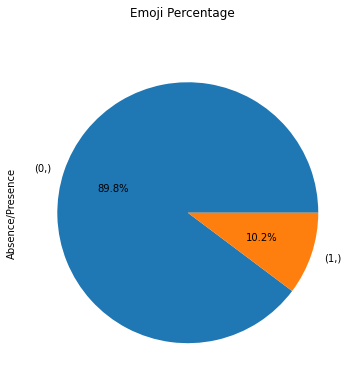

In [41]:
emoji_plot = value.plot.pie(ylabel='Absence/Presence', title='Emoji Percentage', legend=None,subplots=True, figsize=(6, 6), autopct='%1.1f%%')

In [42]:
emoji_plot = emoji_plot[0].get_figure()
emoji_plot.savefig('hyunhotime_emoji_plot.jpg', dpi=100)

In [230]:
pd.DataFrame(df_emoji_binarized).to_csv('sinatraa_emojiCountBinarized.csv', header=['Emoji Absence/Presence'])

## MOST COMMON WORDS

In [9]:
joined_words = sum(preprocessed_text_data, [])
c = Counter(joined_words)

In [10]:
df_most_common_words = pd.DataFrame(c.most_common())

In [302]:
pd.DataFrame(df_most_common_words).to_csv('hyunhotime_MCW.csv', header=['Tweets','Occurences'])

In [12]:
df_most_common_words.columns = ['Words', 'Occurence']
df_most_common_words = df_most_common_words.head(20)
df_most_common_words = df_most_common_words.set_index('Words')
df_most_common_words

,Occurence
Words,
hyunhotime,991
brand,529
afford,525
good,305
want,302
people,287
cheap,262
clothes,208
classist,205


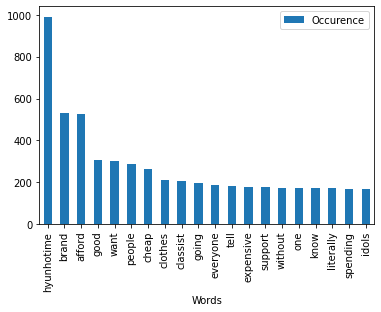

In [11]:
mcw_plot = df_most_common_words.plot.bar();
mcw_plot = mcw_plot.get_figure()
mcw_plot.savefig('hyunhotime_mcw_plot.jpg', dpi=100)

## TF-IDF

In [15]:
vectorizer = TfidfVectorizer(min_df = 2)
X = vectorizer.fit_transform(tweet_documents)

In [16]:
feature_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [157]:
pd.DataFrame(feature_tfidf).to_csv('hyunhotime - tfidf.csv')

In [21]:
feature_tfidf_transposed = feature_tfidf.T
feature_tfidf_transposed = feature_tfidf_transposed.sum(axis=1)
sorted_feature = feature_tfidf_transposed.sort_values(ascending=False)
sorted_feature.index.name ='Words'

In [22]:
sorted_feature

Words
hyunhotime       70.385558
user             17.911362
always           16.774358
bench            14.804180
like             12.710467
                   ...    
international     0.496453
mas               0.482019
name              0.467035
joon              0.453290
seo               0.453290
Length: 397, dtype: float64

In [23]:
sorted_feature = pd.DataFrame(sorted_feature)
sorted_feature.columns = ['TF-IDF Sum']

In [24]:
pd.DataFrame(sorted_feature).to_csv('hyunhotime - tfidf sorted.csv')

In [13]:
sorted_feature = sorted_feature.head(20)

In [14]:
sorted_feature

,TF-IDF Sum
Words,
hyunhotime,70.385558
user,17.911362
always,16.774358
bench,14.804180
like,12.710467
oh,11.512293
cheap,11.263175
brand,11.230069
deactivated,11.207166


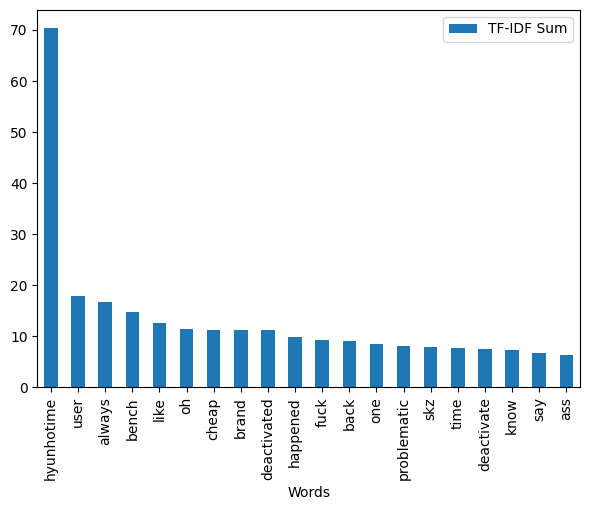

In [267]:
sorted_feature = pd.DataFrame(sorted_feature, columns=["TF-IDF Sum"])
plot = sorted_feature.plot.bar();
plot = plot.get_figure()

In [268]:
plot.savefig('hyunhotime_tf-idf_plot.jpg', dpi=100)

## SENTIMENT ANALYSIS

In [108]:
sentiment_data = tweet_documents

In [109]:
# Getting the polarity and subjectivity of the tweets
positive_tweets = []
negative_tweets = []
tweet_polarity_list = []
polarity_result = []
subjectivity_result = []
subjectivity_analysis = []
for tweet in sentiment_data:
    tweet_polarity = TextBlob(tweet).sentiment.polarity
    tweet_subjectivity = TextBlob(tweet).sentiment.subjectivity
    tweet_polarity_list.append(tweet_polarity)
    subjectivity_result.append(tweet_subjectivity)

In [110]:
for tweet in tweet_polarity_list:
    if tweet == 0.0:
        polarity_result.append('Neutral')
        continue
    elif tweet < 0.0:
        polarity_result.append('Negative')
        continue
    polarity_result.append('Positive')

In [111]:
for tweet in subjectivity_result:
    if tweet > 0.5:
        subjectivity_analysis.append('Subjective')
        continue
    subjectivity_analysis.append('Objective')

In [113]:
sent_analysis = pd.DataFrame({'Polarity Results': tweet_polarity_list,
              'Polarity Analysis': polarity_result,
              'Subjectivity Results': subjectivity_result,
              'Subjectivity Analysis': subjectivity_analysis})
sent_analysis

,Polarity Results,Polarity Analysis,Subjectivity Results,Subjectivity Analysis
0,0.0,Neutral,0.0,Objective
1,0.0,Neutral,0.0,Objective
2,0.0,Neutral,0.0,Objective
3,0.0,Neutral,0.0,Objective
4,-0.4,Negative,0.6,Subjective
...,...,...,...,...
542,0.0,Neutral,0.0,Objective
543,0.8,Positive,0.7,Subjective
544,0.0,Neutral,0.0,Objective
545,0.0,Neutral,0.0,Objective


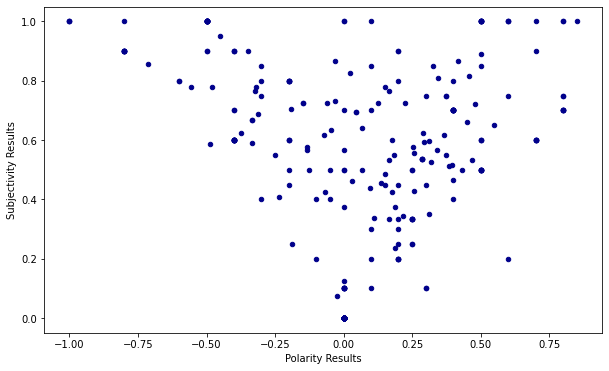

In [120]:
scatter_plot = pd.DataFrame(sent_analysis)
scatter_plot_figure = scatter_plot.plot.scatter(x='Polarity Results', y='Subjectivity Results', c='DarkBlue', figsize=(10, 6))
scatter_plot_figure = scatter_plot_figure.get_figure()
scatter_plot_figure.savefig('hyunhotime_scatter_plot.jpg', dpi=100)

In [114]:
counts_for_polarity = sent_analysis_plot['Polarity Analysis'].value_counts()
counts_for_polarity = pd.DataFrame(counts_for_polarity)
counts_for_polarity['Percent'] = round((counts_for_polarity['Polarity Analysis'] / counts_for_polarity['Polarity Analysis'].sum()) * 100, 1)
counts_for_polarity

,Polarity Analysis,Percent
Neutral,320,58.5
Positive,136,24.9
Negative,91,16.6


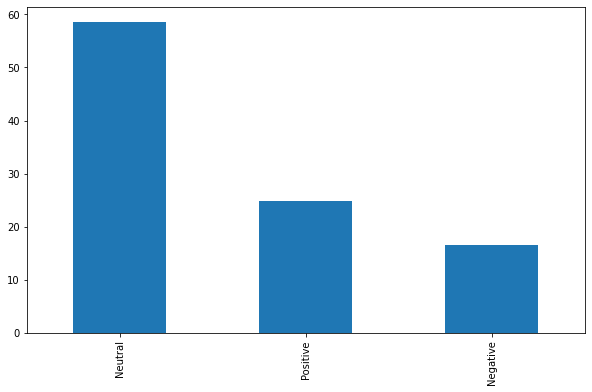

In [121]:
sentiment_analysis_polarity_plot = counts_for_polarity['Percent'].plot.bar(figsize=(10, 6));
sentiment_analysis_polarity_plot = sentiment_analysis_polarity_plot.get_figure()
sentiment_analysis_polarity_plot.savefig('hyunhotime_polarity_barplot.jpg', dpi=100)

In [99]:
pd.DataFrame(sent_analysis).to_csv('hyunhotime_sentimentAnalysisResults.csv')

## EMOTION DETECTION

In [350]:
emotions_detected = []
for tweet in tweet_documents:
    emotions = te.get_emotion(tweet)
    emotions_detected.append(emotions)

In [357]:
emotions_detected = pd.DataFrame(emotions_detected)
emotions_detected

,Happy,Angry,Surprise,Sad,Fear
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
542,0.0,0.0,0.0,0.0,0.0
543,0.0,0.0,0.0,0.0,0.0
544,0.0,0.0,0.0,1.0,0.0
545,0.0,0.0,0.0,0.0,0.0


In [360]:
emotions_transposed = emotions_detected.T
emotions_transposed = emotions_transposed.sum(axis=1)
emotions_transposed

Happy        50.55
Angry        19.80
Surprise     83.05
Sad         110.58
Fear        100.82
dtype: float64

In [353]:
emotions_transposed_plot = pd.DataFrame(emotions_transposed)

In [367]:
emotions_transposed_plot.columns = ['Emotion Value Total']
emotions_transposed_plot

,Emotion Value Total
Happy,50.55
Angry,19.80
Surprise,83.05
Sad,110.58
Fear,100.82


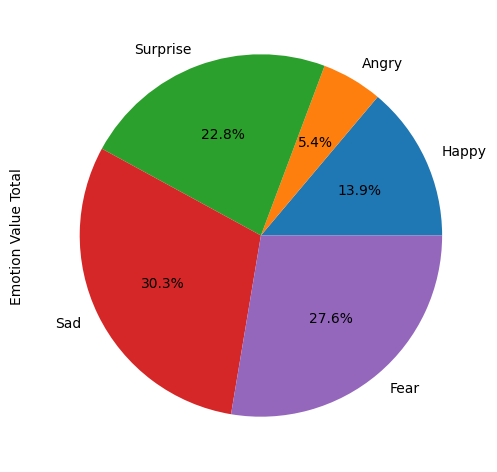

In [371]:
emotions_transposed_plot = emotions_transposed_plot.plot.pie(legend=None,subplots=True, figsize=(6, 6), autopct='%1.1f%%');

In [376]:
emotions_transposed_plot = emotions_transposed_plot[0].get_figure()
emotions_transposed_plot.savefig('hyunhotime_emotion_plot.jpg', dpi=100)

In [29]:
df_emotions_detected = pd.DataFrame(emotions_detected).to_csv('hyunhotime_emotionDetection.csv')